In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
FILE_PATH = [
    "/workspace/outputs/jackal_training_data_0/plane-nerf/2024-02-22_133714/metrics.csv",
    "/workspace/outputs/jackal_training_data_1/plane-nerf/2024-02-21_101204/metrics.csv",
    "/workspace/outputs/jackal_training_data_2/plane-nerf/2024-02-22_150606/metrics.csv",
    "/workspace/outputs/jackal_training_data_5/plane-nerf/2024-02-22_170414/metrics.csv",
    "/workspace/outputs/jackal_training_data_10/plane-nerf/2024-02-23_105931/metrics.csv"
]
# Open csv file as np array
data = []
for i in range(len(FILE_PATH)):
    data.append(np.genfromtxt(FILE_PATH[i], delimiter=',', skip_header=1, names=['psnr', 'ssim', 'lpips']))
    data[i] = np.array([list(data[i][j]) for j in range(len(data[i]))])
data = np.array(data)
# Mean PSNR
mean_psnr = np.mean(data[:,:,0], axis=1)
# Mean SSIM
mean_ssim = np.mean(data[:,:,1], axis=1)
# Mean LPIPS
mean_lpips = np.mean(data[:,:,2], axis=1)
print(f"Mean PSNR: {mean_psnr}")
print(f"Mean SSIM: {mean_ssim}")
print(f"Mean LPIPS: {mean_lpips}")

Mean PSNR: [17.23101352 19.41995451 19.31889952 21.07157662 21.78480222]
Mean SSIM: [0.55107926 0.57836639 0.51849221 0.44603502 0.46339007]
Mean LPIPS: [0.69391327 0.70835085 0.79915282 0.88503986 0.86970151]


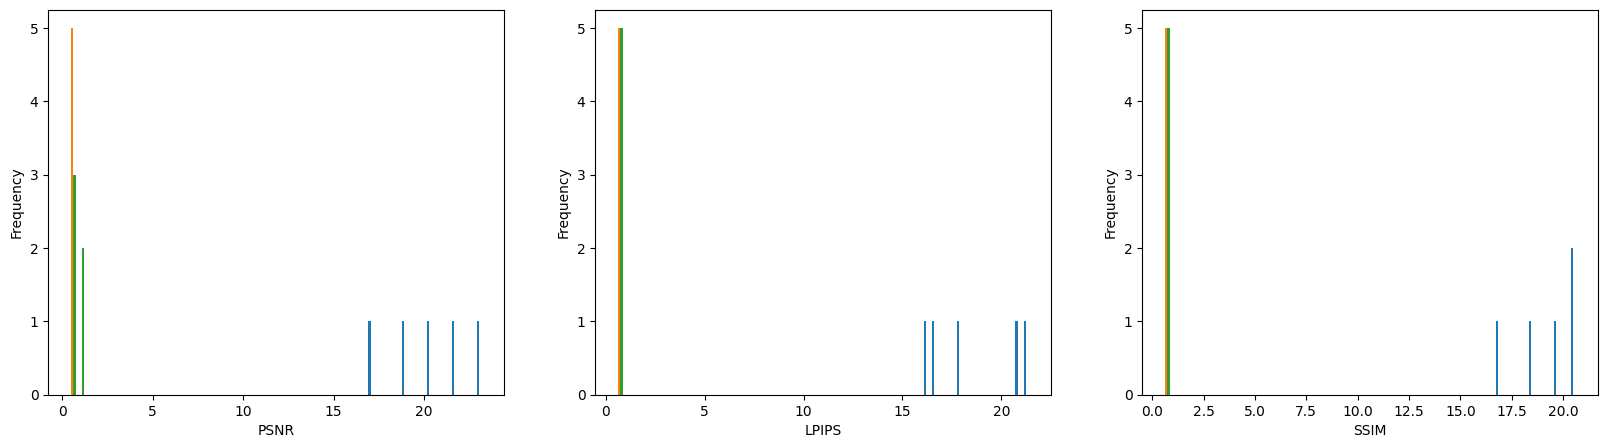

In [4]:
#Plot store_metrics as bin plots as subplots
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(data[:,0],bins=50)
plt.xlabel("PSNR")
plt.ylabel("Frequency")
plt.subplot(1,3,2)
plt.hist(data[:,2],bins=50)
plt.xlabel("LPIPS")
plt.ylabel("Frequency")
plt.subplot(1,3,3)
plt.hist(data[:,1],bins=50)
plt.xlabel("SSIM")
plt.ylabel("Frequency")
plt.show()